In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

In [2]:
# 2014, 2015, 2년 합산 매출, 증감률

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT "2014 구매금액" "2014", "2015 구매금액" "2015", "2014 구매금액" + "2015 구매금액" "합계",
TO_CHAR(("2015 구매금액"-"2014 구매금액")/"2015 구매금액"*100, '99.99') "증감률"
FROM 
(SELECT SUM(구매금액) "2014 구매금액" FROM PURPROD WHERE 연도 = 2014) a,
(SELECT SUM(구매금액) "2015 구매금액" FROM PURPROD WHERE 연도 = 2015) b'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['2014년 총매출액','2015년 총매출액', '총매출액', '2014년 대비 2015년 총매출액 증감률']
df1 = pd.DataFrame(x,columns=columns)
display(df1)
cursor.close()
con.commit()
con.close()

,2014년 총매출액,2015년 총매출액,총매출액,2014년 대비 2015년 총매출액 증감률
0,329601840581,347417316360,677019156941,5.13


In [40]:
# 4분기 동안의 매출액 (2014년 상반기, 하반기, 2015년 상반기, 하반기)

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 연도,분기,SUM(구매금액) 총매출액 FROM PURPROD GROUP BY 분기,연도 ORDER BY 분기, 연도'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연도','분기', '총매출액']
df2 = pd.DataFrame(x,columns=columns)
display(df2)
cursor.close()
con.commit()
con.close()

,year,분기,총매출액
0,2014,1분기,77694762743
1,2015,1분기,84454475955
2,2014,2분기,80545967397
3,2015,2분기,84834674190
4,2014,3분기,74949714657
5,2015,3분기,79536551000
6,2014,4분기,96411395784
7,2015,4분기,98591615215


<AxesSubplot:xlabel='year'>

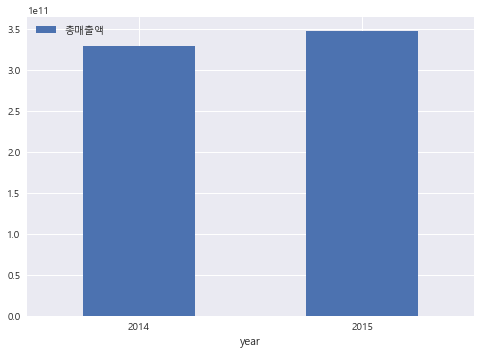

In [41]:
df2.groupby(['연도']).sum().plot(kind='bar',rot = 0)

<AxesSubplot:xlabel='분기,year'>

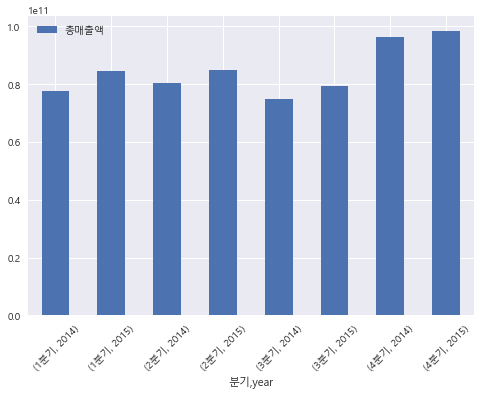

In [43]:
df2.groupby(['분기','연도']).sum().plot(kind='bar',rot = 45)

<AxesSubplot:xlabel='year,분기'>

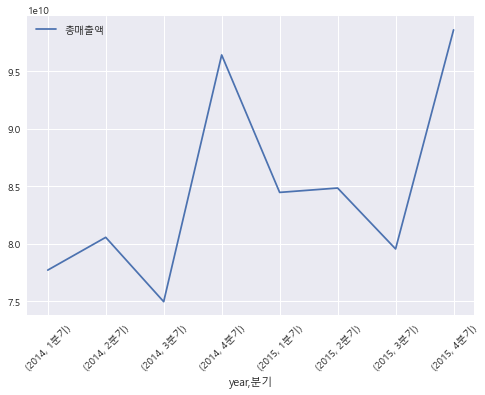

In [46]:
df2.groupby(['연도','분기']).sum().plot(rot = 45)

In [47]:
# 3-2. 제휴사별 여성과 남성으로 나눠 본 연도별 매출액 , 고객별 방문횟수

import cx_Oracle
import numpy as np
import pandas as pd
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select 제휴사,성별, count(성별)구매건수,연도, sum(구매금액) 총매출액 from purprod p,custdemo c
where p.고객번호=c.고객번호 group by 제휴사,성별,연도 order by 제휴사,성별,연도'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['제휴사','성별','구매건수','연도','총매출액']
df3 = pd.DataFrame(x,columns=columns)
display(df3)
cursor.close()
con.commit()
con.close()

,제휴사,성별,구매건수,year,총매출액
0,A,F,2384553,2014,200997228750
1,A,F,2416023,2015,215252464680
2,A,M,479303,2014,48110481450
3,A,M,490439,2015,50480969150
4,B,F,5199031,2014,43361055682
5,B,F,5707997,2015,43970901587
6,B,M,1160395,2014,13009879409
7,B,M,1270651,2015,10879849800
8,C,F,3740974,2014,18806072372
9,C,F,3843508,2015,20431472048


Text(0, 0.5, '구매건수')

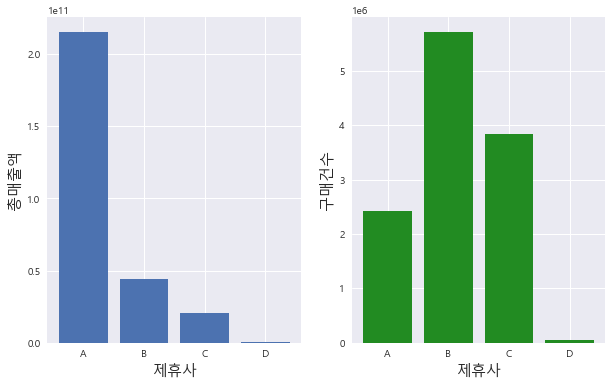

In [48]:
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(df3['제휴사'],df3['총매출액'])
ax2.bar(df3['제휴사'],df3['구매건수'],color ='forestgreen')

ax1.set_xlabel('제휴사',size=15)
ax1.set_ylabel('총매출액',size=15)
ax2.set_xlabel('제휴사',size=15)
ax2.set_ylabel('구매건수',size=15)

In [38]:
# 성별별 매출

pdf1 = df3.pivot_table(index = ['성별', '제휴사'], columns = '연도', values = ['구매건수', '총매출액'])
pdf1

구매건수                   총매출액              
year       2014     2015          2014          2015
성별 제휴사                                              
F  A    2384553  2416023  200997228750  215252464680
   B    5199031  5707997   43361055682   43970901587
   C    3740974  3843508   18806072372   20431472048
   D      26222    54131     232498805     457375110
M  A     479303   490439   48110481450   50480969150
   B    1160395  1270651   13009879409   10879849800
   C     871977   922777    5004920814    5818505655
   D       9059    15990      79703299     125778330

In [37]:
# 이상치 

sns.boxplot(x = df1.species, y = df1.length)
df.groupby('species').describe()

Q1_A = df1.loc[df['species'] == 'A'].quantile(0.25)
Q3_A = df1.loc[df['species'] == 'A'].quantile(0.75)
Q1_B = df1.loc[df['species'] == 'B'].quantile(0.25)
Q3_B = df1.loc[df['species'] == 'B'].quantile(0.75)

IQR_A = Q3_A - Q1_A
IQR_B = Q3_B - Q3_B

AttributeError: 'DataFrame' object has no attribute 'species'

In [ ]:
# 2가지 막대그래프 합쳐서 비교

plt.figure(figsize = (25, 8))

plt.bar(df4['position'].value_counts().index, list(df4['position'].value_counts()), width = 0.8, label = '모든 기타 호칭') # 모든 기타 호칭
plt.bar(df5['position'].value_counts().index, list(df5['position'].value_counts()), width = 0.8, label = '기타 호칭 중에서 생존한 남성') # 기타 호칭 중에서 생존한 남성
plt.xticks(rotation = 45, size = 15)
plt.legend(fontsize = 15)

In [ ]:
# 원형그래프

df_pclass = pd.pivot_table(df,
                           values = 'survived',
                           index = 'pclass',
                           aggfunc = 'mean')

display(df_pclass)

ratio = []
for i in range(len(df_pclass['survived'])):
    a = df_pclass['survived'].iloc[i] / df_pclass['survived'].sum()
    ratio.append(a)
labels = df_pclass.index

plt.figure(figsize = (10, 10))
plt.pie(ratio, autopct = '%.1f%%', textprops = {'fontsize' : 15}, startangle = 0)
plt.legend(labels = df_pclass.index, fontsize = 20)

## # 경쟁사 분석
---

In [4]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT a.고객번호, a.제휴사, B.성별, 연령대, 거주지역, 경쟁사이용횟수, 매출
FROM
(SELECT 고객번호, 제휴사, COUNT(경쟁사) "경쟁사이용횟수", SUBSTR(이용년월, 0, 4) "YEAR" FROM COMPET
GROUP BY 고객번호, 제휴사, SUBSTR(이용년월, 0, 4)
ORDER BY 고객번호) a,
(SELECT * FROM 번호제휴성별연도건수매출
WHERE 연도 = 2015) b,
CUSTDEMO C
WHERE a.고객번호 = b.고객번호 AND a.제휴사 = b.제휴사 AND a.고객번호 = c.고객번호 AND B.성별 = C.성별
ORDER BY a.고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '제휴사', '성별', '연령대', '거주지', '경쟁사이용횟수', '매출']
df = pd.DataFrame(x,columns=columns)
display(df)
cursor.close()
con.commit()
con.close()

,고객번호,제휴사,성별,연령대,거주지,경쟁사이용횟수,매출
0,00001,A,M,60세이상,060,2,30183640
1,00001,B,M,60세이상,060,8,393036
2,00001,C,M,60세이상,060,5,424207
3,00002,A,M,60세이상,100,2,53286470
4,00002,B,M,60세이상,100,3,132500
...,...,...,...,...,...,...,...
7831,19375,A,F,25세~29세,049,1,161950
7832,19375,B,F,25세~29세,049,2,20155050
7833,19375,D,F,25세~29세,049,2,9900
7834,19376,B,M,20세~24세,024,1,5430607


### # 제휴사 기준으로 나누기
---

In [5]:
df_A = df.loc[df['제휴사'] == 'A']
df_B = df.loc[df['제휴사'] == 'B']
df_C = df.loc[df['제휴사'] == 'C']
df_D = df.loc[df['제휴사'] == 'D']
df_A.columns = ['고객번호', '제휴사', '성별', '연령대', '거주지', 'A경쟁사이용횟수', '매출']
df_B.columns = ['고객번호', '제휴사', '성별', '연령대', '거주지', 'B경쟁사이용횟수', '매출']
df_C.columns = ['고객번호', '제휴사', '성별', '연령대', '거주지', 'C경쟁사이용횟수', '매출']
df_D.columns = ['고객번호', '제휴사', '성별', '연령대', '거주지', 'D경쟁사이용횟수', '매출']

df_A

,고객번호,제휴사,성별,연령대,거주지,A경쟁사이용횟수,매출
0,00001,A,M,60세이상,060,2,30183640
3,00002,A,M,60세이상,100,2,53286470
6,00004,A,F,60세이상,016,2,5934830
8,00007,A,F,60세이상,036,1,38314500
9,00008,A,M,60세이상,010,1,32241700
...,...,...,...,...,...,...,...
7820,19334,A,M,35세~39세,310,14,382000
7823,19355,A,F,20세~24세,100,1,194920
7824,19362,A,F,45세~49세,016,2,28842660
7827,19367,A,M,45세~49세,020,1,11180490


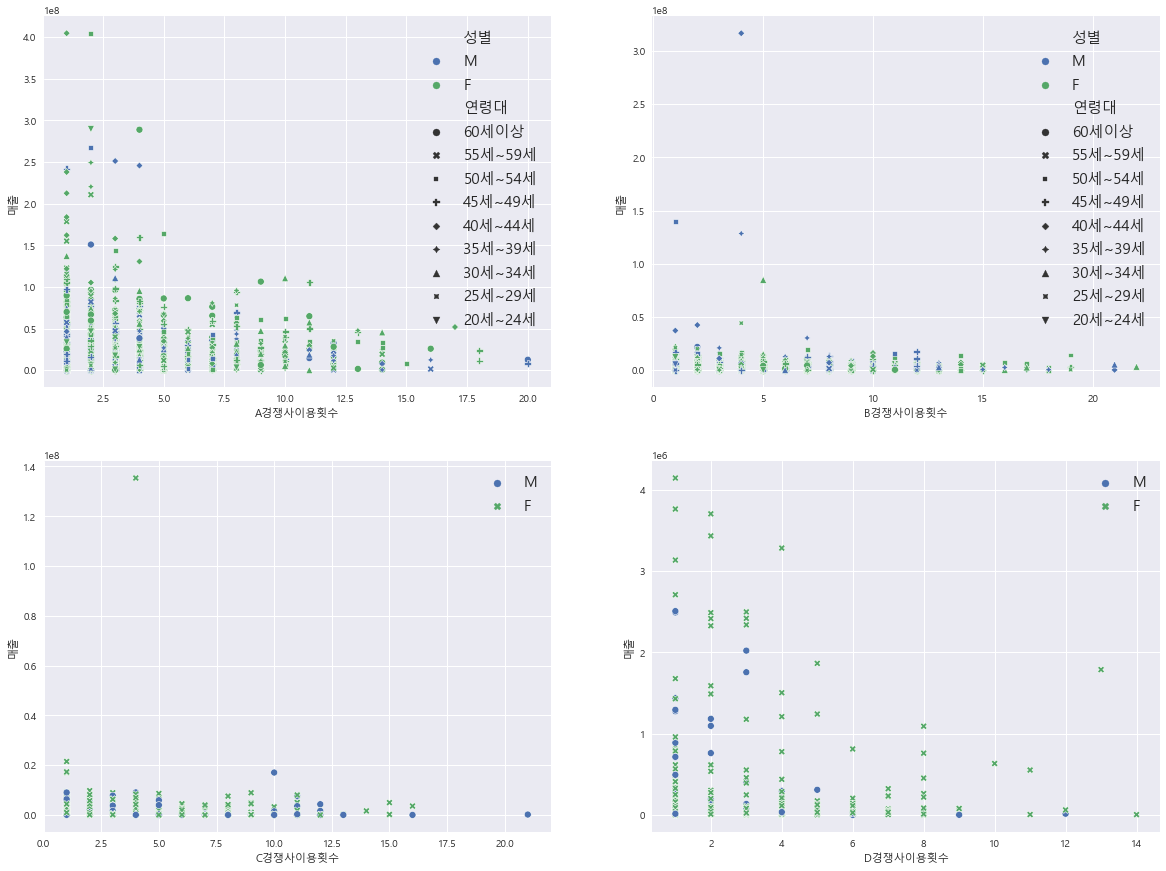

In [7]:
# 시각화

fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.scatterplot(data = df_A, x = 'A경쟁사이용횟수', y = '매출', hue = '성별', style = '연령대', ax = ax1)
sns.scatterplot(data = df_B, x = 'B경쟁사이용횟수', y = '매출', hue = '성별', style = '연령대', ax = ax2)
sns.scatterplot(data = df_C, x = 'C경쟁사이용횟수', y = '매출', hue = '성별', style = '성별', ax = ax3)
sns.scatterplot(data = df_D, x = 'D경쟁사이용횟수', y = '매출', hue = '성별', style = '성별', ax = ax4)
ax1.legend(fontsize = '15')
ax2.legend(fontsize = '15')
ax3.legend(fontsize = '15')
ax4.legend(fontsize = '15')

## # RFM 분석
---

### # 연도 전체 기준
---

In [8]:
# 제휴사별

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 고객번호, 제휴사, TO_DATE(20151231)-MAX(TO_DATE(구매일자)) Recency, COUNT(구매금액) Frequency, SUM(구매금액) Monetary
FROM LCL
GROUP BY 고객번호, 제휴사
ORDER BY 고객번호, 제휴사'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','제휴사','Recency','Frequency','Monetary']
RFM_abcd = pd.DataFrame(x,columns=columns)
display(RFM_abcd)
cursor.close()
con.commit()
con.close()

RFM_A = RFM_abcd.loc[RFM_abcd['제휴사'] == 'A']
RFM_B = RFM_abcd.loc[RFM_abcd['제휴사'] == 'B']
RFM_C = RFM_abcd.loc[RFM_abcd['제휴사'] == 'C']
RFM_D = RFM_abcd.loc[RFM_abcd['제휴사'] == 'D']

,고객번호,제휴사,Recency,Frequency,Monetary
0,00001,A,1,874,83227150
1,00001,B,15,64,790976
2,00001,C,5,119,1024424
3,00002,A,1,1080,99454850
4,00002,B,230,16,209450
...,...,...,...,...,...
58626,19382,C,90,3,7990
58627,19383,A,9,18,1104800
58628,19383,B,155,16,48600
58629,19383,C,169,3,8590


In [154]:
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 고객번호, TO_DATE('2015-12-31') - MAX(TO_DATE(구매일자)) Recency, COUNT(구매금액) Frequency, SUM(구매금액) Monetary
FROM LCL
GROUP BY 고객번호
ORDER BY 고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','Recency','Frequency','Monetary']
RFM = pd.DataFrame(x,columns=columns)
display(RFM)
cursor.close()
con.commit()
con.close()

,고객번호,Recency,Frequency,Monetary
0,00001,1,1057,85042550
1,00002,1,1116,99880760
2,00003,3,1191,3165167
3,00004,0,930,16693810
4,00005,3,719,13237070
...,...,...,...,...
19378,19379,5,584,5779280
19379,19380,1,440,3912977
19380,19381,0,805,6040669
19381,19382,0,906,4401773


In [155]:
RFM.describe()

,Recency,Frequency,Monetary
count,19383.000000,19383.000000,1.938300e+04
mean,3.279936,1475.160192,3.492850e+07
std,20.107624,794.798667,6.435374e+07
min,0.000000,1.000000,1.549000e+04
25%,0.000000,851.000000,1.093242e+07
50%,1.000000,1332.000000,1.717624e+07
75%,2.000000,1951.000000,3.935635e+07
max,727.000000,10290.000000,3.571832e+09


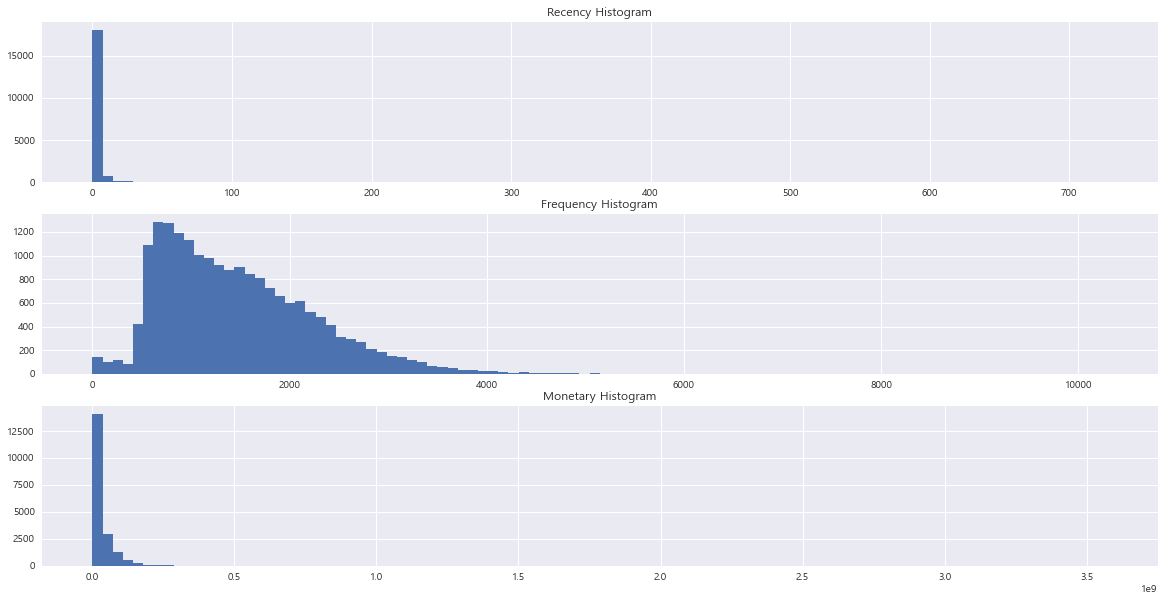

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows =3, ncols=1)
ax1.set_title('Recency Histogram')
ax1.hist(RFM['Recency'], bins =100)

ax2.set_title('Frequency Histogram')
ax2.hist(RFM['Frequency'], bins =100)

ax3.set_title('Monetary Histogram')
ax3.hist(RFM['Monetary'], bins =100)

plt.show()

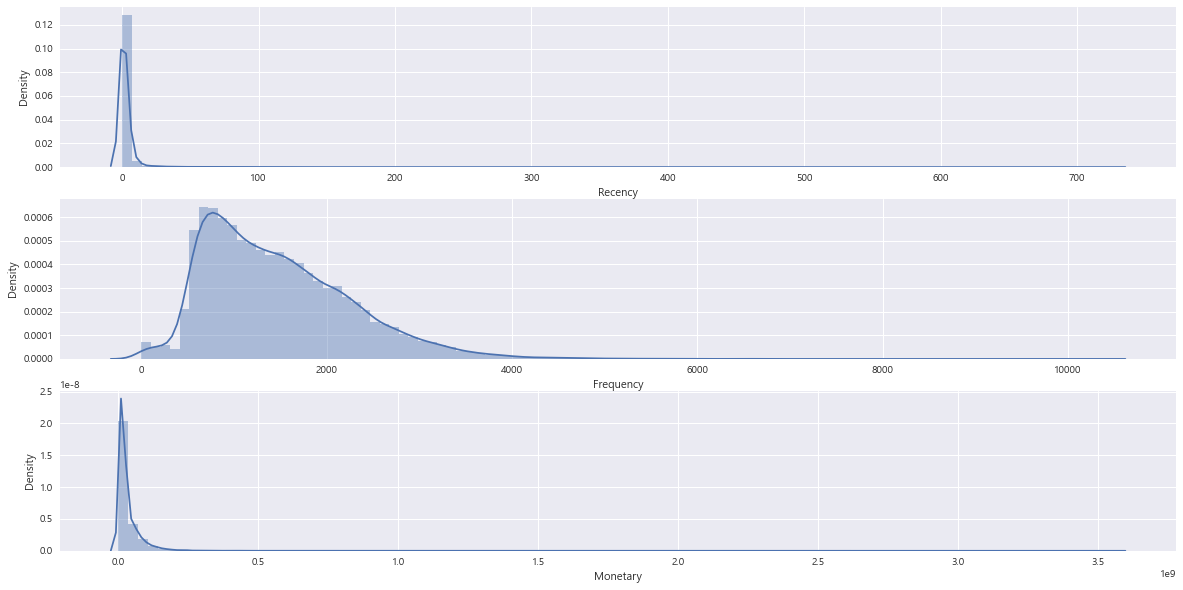

In [157]:
plt.figure(figsize = (20,10))

# R의 플롯 분포
plt.subplot(3,1,1)
sns.distplot(RFM['Recency'], bins = 100)

plt.subplot(3,1,2)
sns.distplot(RFM['Frequency'], bins = 100)

plt.subplot(3,1,3)
sns.distplot(RFM['Monetary'], bins = 100)

plt.show()

In [122]:
RFM["FrequencyScore"] = pd.cut(RFM["Frequency"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Frequency"], 25), 
                                             np.percentile(RFM["Frequency"], 50), 
                                             np.percentile(RFM["Frequency"], 75), 
                                             RFM["Frequency"].max()], 
                                    labels=[1, 2, 3, 4]).astype("int")

RFM["MonetaryScore"] = pd.cut(RFM["Monetary"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Monetary"], 25), 
                                             np.percentile(RFM["Monetary"], 50), 
                                             np.percentile(RFM["Monetary"], 75), 
                                             RFM["Monetary"].max()], 
                                    labels=[1, 2, 3, 4]).astype("int")

RFM["RecencyScore"] = pd.cut(RFM["Recency"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Recency"], 25), 
                                             np.percentile(RFM["Recency"], 50), 
                                             np.percentile(RFM["Recency"], 75), 
                                             RFM["Recency"].max()], 
                                    labels=[4, 3, 2, 1]).astype("int")

RFM["RFMSegment"] = RFM["RecencyScore"].astype(str) + RFM["FrequencyScore"].astype(str) + RFM["MonetaryScore"].astype(str)
# RFM["RFMSegment"] = RFM["RFMSegment"].astype(int)
RFM["RFM"] = RFM["RecencyScore"] + RFM["FrequencyScore"] + RFM["MonetaryScore"]
RFM
RFM.to_csv('RFMTOTAL')

,고객번호,Recency,Frequency,Monetary,FrequencyScore,MonetaryScore,RecencyScore,RFMSegment,RFM
0,00001,1,1057,85042550,2,4,3,324,9
1,00002,1,1116,99880760,2,4,3,324,9
2,00003,3,1191,3165167,2,1,1,121,4
3,00004,0,930,16693810,2,2,4,422,8
4,00005,3,719,13237070,1,2,1,112,4
...,...,...,...,...,...,...,...,...,...
19378,19379,5,584,5779280,1,1,1,111,3
19379,19380,1,440,3912977,1,1,3,311,5
19380,19381,0,805,6040669,1,1,4,411,6
19381,19382,0,906,4401773,2,1,4,421,7


Text(0.5, 1.0, '2014~2015')

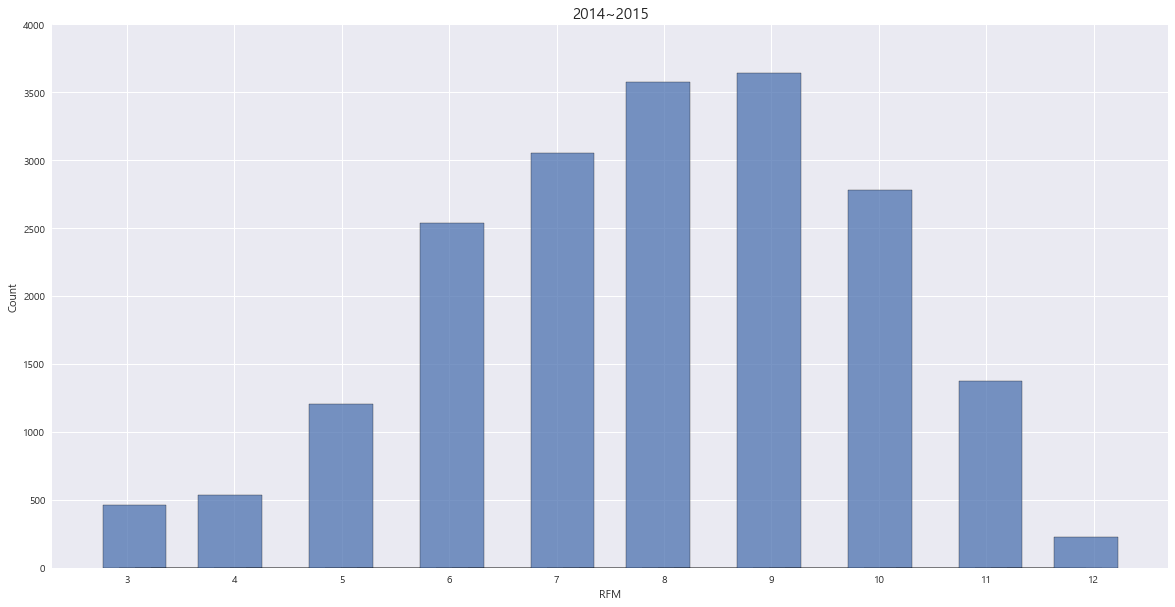

In [146]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(RFM['RFM'], shrink = 4)
plt.ylim(0, 4000)
plt.xticks(np.arange(3, 13))
plt.title('2014~2015', fontsize = 15)

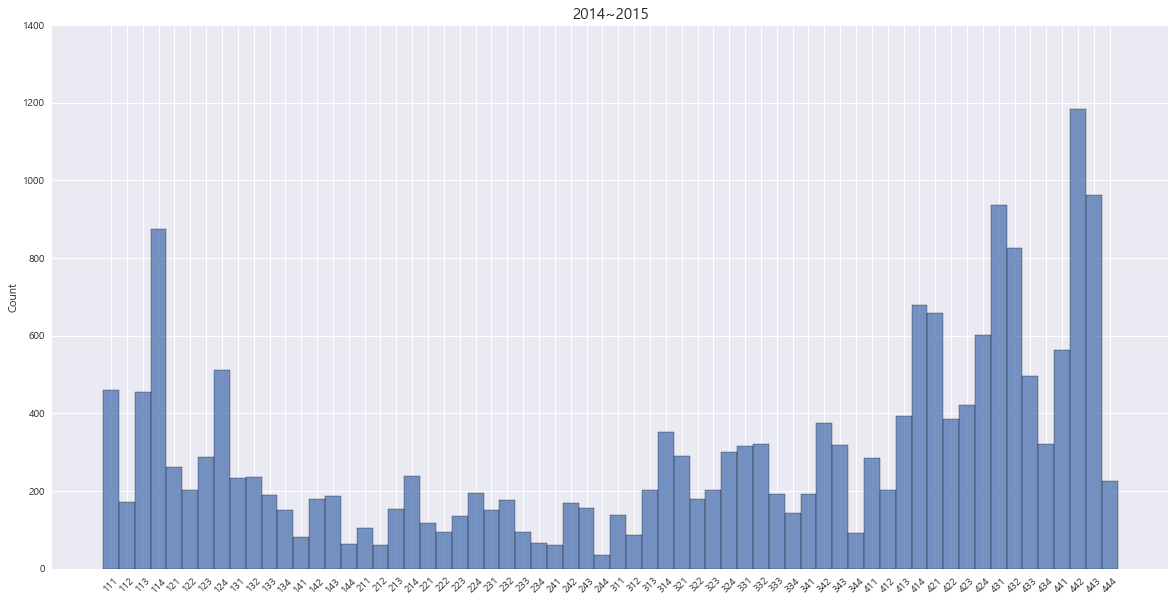

In [147]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(np.sort(RFM['RFMSegment']))
plt.xticks(rotation = 45)
plt.ylim(0, 1400)
plt.title('2014~2015', fontsize = 15)
plt.show()

### # 2015 기준
---

In [148]:
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 고객번호, TO_DATE(20151231)-MAX(TO_DATE(구매일자)) "Recency", COUNT(구매금액) "Frequency", SUM(구매금액) "Monetary"
FROM LCL
WHERE 연도 = 2015
GROUP BY 고객번호
ORDER BY 고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','Recency','Frequency','Monetary']
RFM = pd.DataFrame(x,columns=columns)
display(RFM)
cursor.close()
con.commit()
con.close()

,고객번호,Recency,Frequency,Monetary
0,00001,1,463,31000883
1,00002,1,506,53635430
2,00003,3,452,1271398
3,00004,0,488,7394194
4,00005,3,212,5551190
...,...,...,...,...
19363,19379,5,497,4588660
19364,19380,1,423,3390277
19365,19381,0,805,6040669
19366,19382,0,906,4401773


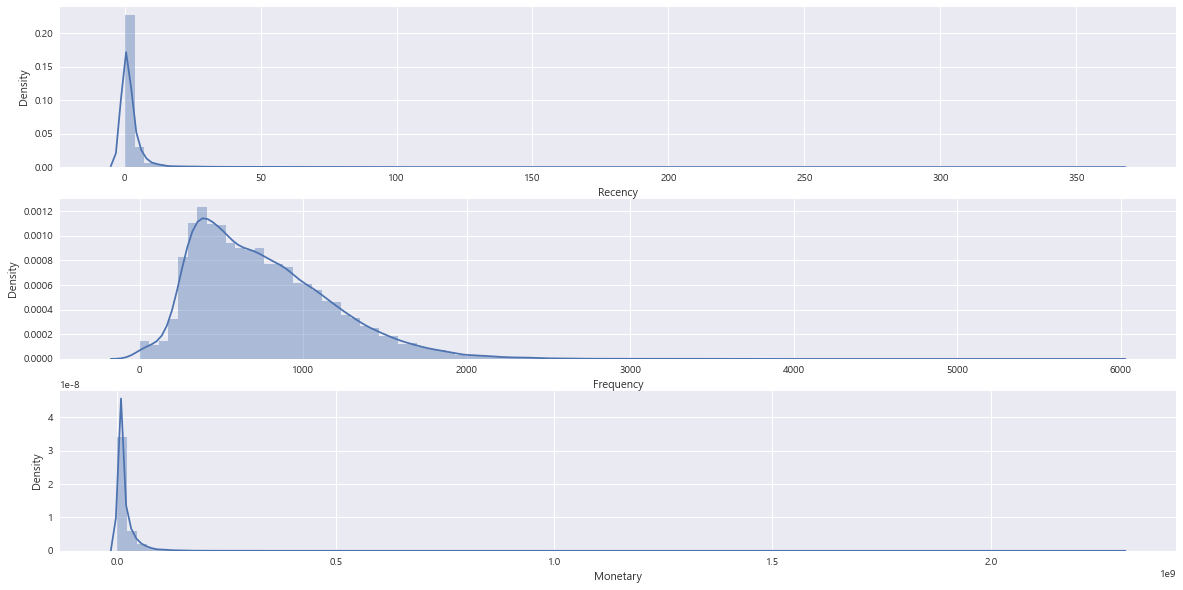

In [149]:
plt.figure(figsize = (20,10))

# R의 플롯 분포
plt.subplot(3,1,1)
sns.distplot(RFM['Recency'], bins = 100)

plt.subplot(3,1,2)
sns.distplot(RFM['Frequency'], bins = 100)

plt.subplot(3,1,3)
sns.distplot(RFM['Monetary'], bins = 100)

plt.show()

In [150]:
RFM["FrequencyScore"] = pd.cut(RFM["Frequency"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Frequency"], 25), 
                                             np.percentile(RFM["Frequency"], 50), 
                                             np.percentile(RFM["Frequency"], 75), 
                                             RFM["Frequency"].max()], 
                                    labels=[1, 2, 3, 4]).astype("int")

RFM["MonetaryScore"] = pd.cut(RFM["Monetary"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Monetary"], 25), 
                                             np.percentile(RFM["Monetary"], 50), 
                                             np.percentile(RFM["Monetary"], 75), 
                                             RFM["Monetary"].max()], 
                                    labels=[1, 2, 3, 4]).astype("int")

RFM["RecencyScore"] = pd.cut(RFM["Recency"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Recency"], 25), 
                                             np.percentile(RFM["Recency"], 50), 
                                             np.percentile(RFM["Recency"], 75), 
                                             RFM["Recency"].max()], 
                                    labels=[4, 3, 2, 1]).astype("int")

RFM["RFMSegment"] = RFM["RecencyScore"].astype(str) + RFM["FrequencyScore"].astype(str) + RFM["MonetaryScore"].astype(str)
RFM["RFM"] = RFM["RecencyScore"] + RFM["FrequencyScore"] + RFM["MonetaryScore"]
RFM

,고객번호,Recency,Frequency,Monetary,FrequencyScore,MonetaryScore,RecencyScore,RFMSegment,RFM
0,00001,1,463,31000883,2,4,3,324,9
1,00002,1,506,53635430,2,4,3,324,9
2,00003,3,452,1271398,2,1,1,121,4
3,00004,0,488,7394194,2,2,4,422,8
4,00005,3,212,5551190,1,2,1,112,4
...,...,...,...,...,...,...,...,...,...
19363,19379,5,497,4588660,2,1,1,121,4
19364,19380,1,423,3390277,1,1,3,311,5
19365,19381,0,805,6040669,3,2,4,432,9
19366,19382,0,906,4401773,3,1,4,431,8


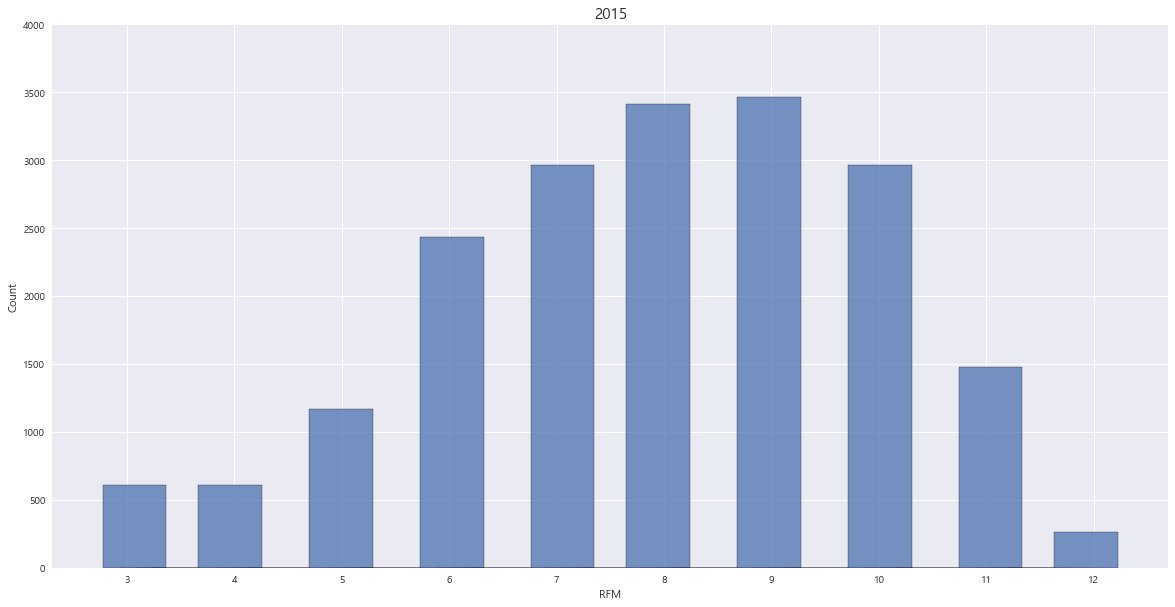

In [152]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(RFM['RFM'], shrink = 4)
plt.ylim(0, 4000)
plt.xticks(np.arange(3, 13))
plt.title('2015', fontsize = 15)
plt.show()

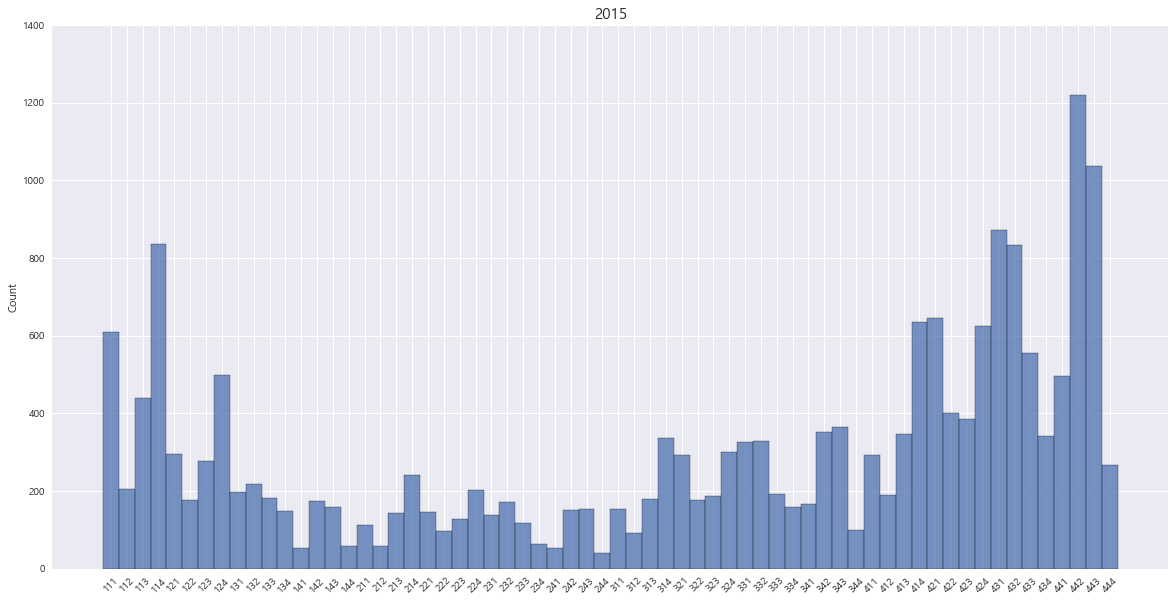

In [153]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(np.sort(RFM['RFMSegment']))
plt.xticks(rotation = 45)
plt.ylim(0, 1400)
plt.title('2015', fontsize = 15)
plt.show()

## # 연령대 분석
---

### # 매출
---

In [2]:
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 연령대, COUNT(연령대) 고객수, SUM(구매금액) 총매출액 FROM LCL
GROUP BY 연령대 
ORDER BY 연령대'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연령대','고객수','총매출액']
agegroup = pd.DataFrame(x,columns=columns)
display(agegroup)
cursor.close()
con.commit()
con.close()

,연령대,고객수,총매출액
0,19세이하,19470,140593647
1,20세~24세,255610,3929990387
2,25세~29세,742097,18624980673
3,30세~34세,2291194,51126952633
4,35세~39세,4328086,102581074645
5,40세~44세,5934913,124258607541
6,45세~49세,6450821,131191999671
7,50세~54세,4453475,110464032296
8,55세~59세,2431848,74073428801
9,60세이상,1685516,60627496647


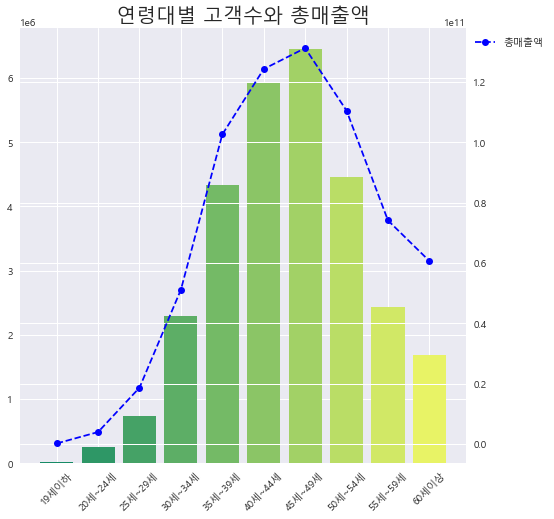

In [3]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sns.color_palette('summer', len(agegroup.연령대))

xtick_label_position = list(range(len(agegroup.연령대)))
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(agegroup.연령대, rotation = 45)
ax1.bar(xtick_label_position,agegroup.고객수, color = colors)

color = 'blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,agegroup.총매출액, color = 'b', linestyle='--',marker='o')
plt.title('연령대별 고객수와 총매출액',fontsize=20)
plt.legend(labels =['총매출액','고객수'],loc = 2, bbox_to_anchor = (1,1) )
plt.show()

## # 세분류 분석
---

In [18]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='SELECT PRODCL.제휴사,연도,PRODCL.분류,SUM(구매금액) FROM PURPROD,PRODCL WHERE PURPROD.제휴사 = PRODCL.제휴사 \
GROUP BY PRODCL.제휴사,연도,PRODCL.분류 ORDER BY 연도,제휴사'
cursor.execute(sql)
x = cursor.fetchall()
columns = ['제휴사','년','분류','합계']
df = pd.DataFrame(x,columns=columns)
display(df)
cursor.close()
con.commit()
con.close()

,제휴사,년,분류,합계
0,A,2014,가공식품,11708062379400
1,A,2014,가구/인테리어,4982154204000
2,A,2014,교육/문화용품,1494646261200
3,A,2014,기타,249107710200
4,A,2014,디지털/가전,4982154204000
...,...,...,...,...
87,D,2015,유아동,2332613760
88,D,2015,의약품/의료기기,5248380960
89,D,2015,일상용품,46069121760
90,D,2015,전문스포츠/레저,1749460320


In [23]:
label=['가공식품','신선식품','일상용품','의약품/의료기기','교육/문화용품','외식','기타','디지털/가전',
      '가구/인테리어','의류','전문스포츠/레저','패션잡화','유아동','명품']
data=[]
df_A_2014 = df.loc[(df['제휴사']=='A') & (df['년']==2014)]
df_mapping = pd.DataFrame({
    '분류': label,
})
sort_mapping = df_mapping.reset_index().set_index('분류')
df_A_2014['분류_num'] = df_A_2014['분류'].map(sort_mapping['index'])
df_A_2014=df_A_2014.sort_values('분류_num')
df_A_2014=df_A_2014.set_index('분류_num')
for i in range(13):
    try:
        data.append(df_A_2014['합계'][i])
    except:
        data.append(0)

In [33]:
label=['가공식품','신선식품','일상용품','의약품/의료기기','교육/문화용품','외식','기타','디지털/가전',
      '가구/인테리어','의류','전문스포츠/레저','패션잡화','유아동','명품']
data=[]
df_A_2014 = df.loc[(df['제휴사']=='D') & (df['년']==2014)]
df_mapping = pd.DataFrame({
    '분류': label,
})
sort_mapping = df_mapping.reset_index().set_index('분류')
df_A_2014['분류_num'] = df_A_2014['분류'].map(sort_mapping['index'])
df_A_2014=df_A_2014.sort_values('분류_num')
df_A_2014=df_A_2014.set_index('분류_num')
for i in range(13):
    try:
        data.append(df_A_2014['합계'][i])
    except:
        data.append(0)

In [34]:
df_A_2014

,제휴사,년,분류,합계
분류_num,,,,
0,D,2014,가공식품,13112488368
2,D,2014,일상용품,24663966216
3,D,2014,의약품/의료기기,2809818936
4,D,2014,교육/문화용품,312202104
7,D,2014,디지털/가전,936606312
10,D,2014,전문스포츠/레저,936606312
11,D,2014,패션잡화,1248808416
12,D,2014,유아동,1248808416


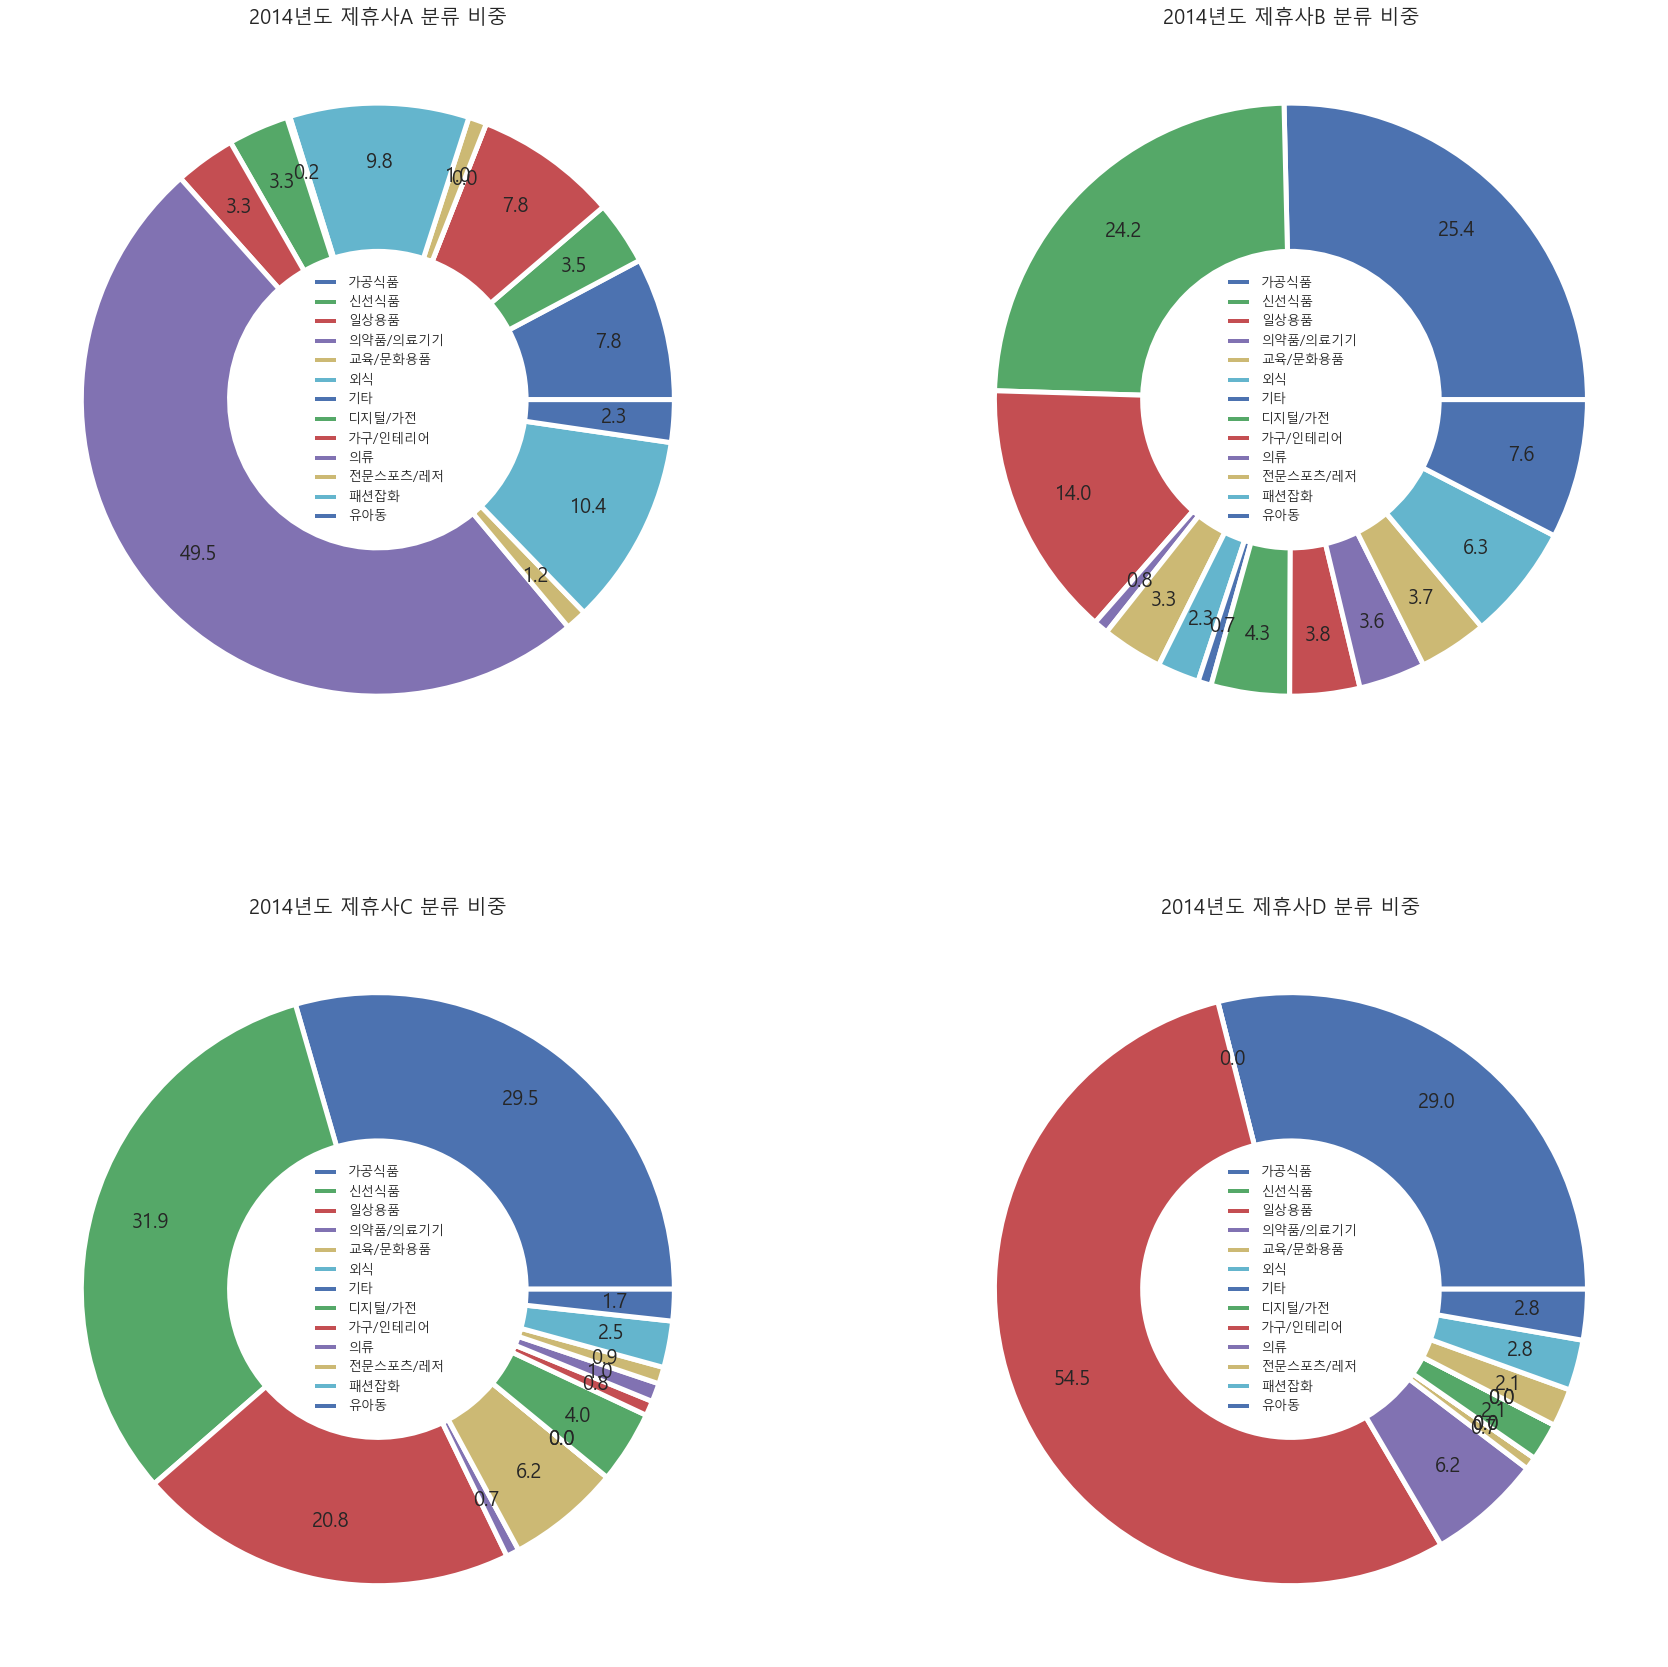

In [35]:
# 2014년도 제휴사별 품목 비율

color_palette_list = ['#FF0000','#ff0033','#ff0066']
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize = (30, 30))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

label=['가공식품','신선식품','일상용품','의약품/의료기기','교육/문화용품','외식','기타','디지털/가전',
      '가구/인테리어','의류','전문스포츠/레저','패션잡화','유아동','명품']
data=[]
df_A_2014 = df.loc[(df['제휴사']=='A') & (df['년']==2014)]
df_mapping = pd.DataFrame({
    '분류': label,
})
sort_mapping = df_mapping.reset_index().set_index('분류')
df_A_2014['분류_num'] = df_A_2014['분류'].map(sort_mapping['index'])
df_A_2014=df_A_2014.sort_values('분류_num')
df_A_2014=df_A_2014.set_index('분류_num')
for i in range(13):
    try:
        data.append(df_A_2014['합계'][i])
    except:
        data.append(0)

ax1.pie(data ,wedgeprops=wedgeprops,textprops={'fontsize': 20},autopct='%.1f',pctdistance=0.8)
ax1.set_title("2014년도 제휴사A 분류 비중",size=20)

data=[]
df_A_2014 = df.loc[(df['제휴사']=='B') & (df['년']==2014)]
df_mapping = pd.DataFrame({
    '분류': label,
})
sort_mapping = df_mapping.reset_index().set_index('분류')
df_A_2014['분류_num'] = df_A_2014['분류'].map(sort_mapping['index'])
df_A_2014=df_A_2014.sort_values('분류_num')
df_A_2014=df_A_2014.set_index('분류_num')
for i in range(13):
    try:
        data.append(df_A_2014['합계'][i])
    except:
        data.append(0)

ax2.pie(data ,wedgeprops=wedgeprops,textprops={'fontsize': 20},autopct='%.1f',pctdistance=0.8)
ax2.set_title("2014년도 제휴사B 분류 비중",size=20)

data=[]
df_A_2014 = df.loc[(df['제휴사']=='C') & (df['년']==2014)]
df_mapping = pd.DataFrame({
    '분류': label,
})
sort_mapping = df_mapping.reset_index().set_index('분류')
df_A_2014['분류_num'] = df_A_2014['분류'].map(sort_mapping['index'])
df_A_2014=df_A_2014.sort_values('분류_num')
df_A_2014=df_A_2014.set_index('분류_num')
for i in range(13):
    try:
        data.append(df_A_2014['합계'][i])
    except:
        data.append(0)
        
ax3.pie(data ,wedgeprops=wedgeprops,textprops={'fontsize': 20},autopct='%.1f',pctdistance=0.8)
ax3.set_title("2014년도 제휴사C 분류 비중",size=20)

data=[]
df_A_2014 = df.loc[(df['제휴사']=='D') & (df['년']==2014)]
df_mapping = pd.DataFrame({
    '분류': label,
})
sort_mapping = df_mapping.reset_index().set_index('분류')
df_A_2014['분류_num'] = df_A_2014['분류'].map(sort_mapping['index'])
df_A_2014=df_A_2014.sort_values('분류_num')
df_A_2014=df_A_2014.set_index('분류_num')
for i in range(13):
    try:
        data.append(df_A_2014['합계'][i])
    except:
        data.append(0)

ax4.pie(data ,wedgeprops=wedgeprops,textprops={'fontsize': 20},autopct='%.1f',pctdistance=0.8)
ax4.set_title("2014년도 제휴사D 분류 비중",size=20)
        
ax1.legend(labels=label,loc='center',fontsize=13)
ax2.legend(labels=label,loc='center',fontsize=13)
ax3.legend(labels=label,loc='center',fontsize=13)
ax4.legend(labels=label,loc='center',fontsize=13) 